In [2]:
from transformers import AutoImageProcessor, AutoModel, CLIPVisionModel

import cv2
import torch

import numpy as np
from sklearn.decomposition import PCA

from matplotlib import pyplot as plt

In [33]:
# model_name = "facebook/dinov2-base"
model_name = "openai/clip-vit-base-patch16"

In [34]:
# Load model directly
processor = AutoImageProcessor.from_pretrained(model_name)

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [35]:
# model = AutoModel.from_pretrained(model_name, output_attentions=True)
model = CLIPVisionModel.from_pretrained(model_name, output_attentions=True)
model

pytorch_model.bin:   0%|          | 0.00/599M [00:00<?, ?B/s]

CLIPVisionModel(
  (vision_model): CLIPVisionTransformer(
    (embeddings): CLIPVisionEmbeddings(
      (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16), bias=False)
      (position_embedding): Embedding(197, 768)
    )
    (pre_layrnorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=True)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
       

In [36]:
sample_image_path="/run/media/maverick/Backup/datasets/phrasecut/images/1159630.jpg"

In [37]:
image = cv2.imread(sample_image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

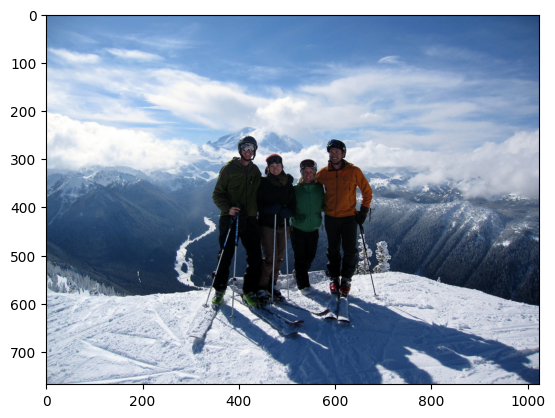

In [38]:
plt.imshow(image);

In [39]:
processed_image = processor(image, return_tensors="pt")
processed_image

{'pixel_values': tensor([[[[-0.2740, -0.2740, -0.3032,  ..., -1.0623, -1.0623, -1.0623],
          [-0.2594, -0.2594, -0.2740,  ..., -1.0477, -1.0477, -1.0477],
          [-0.2740, -0.2594, -0.2594,  ..., -1.0331, -1.0185, -1.0039],
          ...,
          [ 1.0398,  1.1420,  1.2734,  ...,  1.2296,  1.1858,  1.0982],
          [ 1.6822,  1.6968,  1.6530,  ...,  1.1712,  1.0982,  1.0836],
          [ 1.0690,  0.8355,  0.8063,  ...,  1.1712,  1.2442,  1.2734]],

         [[ 0.4691,  0.4540,  0.4540,  ..., -0.3564, -0.3564, -0.3564],
          [ 0.4691,  0.4691,  0.4691,  ..., -0.3414, -0.3414, -0.3414],
          [ 0.4841,  0.4691,  0.4841,  ..., -0.3114, -0.3264, -0.3114],
          ...,
          [ 1.4295,  1.4746,  1.5796,  ...,  1.4145,  1.3545,  1.2795],
          [ 1.8498,  1.8648,  1.7897,  ...,  1.3545,  1.2795,  1.3395],
          [ 1.2795,  0.9643,  1.0093,  ...,  1.4145,  1.4596,  1.4896]],

         [[ 1.3780,  1.3780,  1.3922,  ...,  0.6386,  0.6244,  0.6244],
          [ 1

In [40]:
shape = processed_image["pixel_values"].shape
shape

torch.Size([1, 3, 224, 224])

In [41]:
shape[-1]/14

16.0

In [42]:
with torch.inference_mode():
    model_outputs = model(**processed_image)

In [43]:
last_attention_map = model_outputs.attentions[-1]
last_attention_map

tensor([[[[9.2721e-02, 3.1935e-04, 2.6498e-04,  ..., 4.6099e-04,
           1.9694e-04, 1.5912e-04],
          [1.2459e-02, 1.5327e-02, 1.3995e-02,  ..., 5.4607e-03,
           8.1341e-03, 8.9361e-03],
          [2.4719e-02, 1.8096e-02, 1.7326e-02,  ..., 5.4622e-03,
           4.4688e-03, 4.3558e-03],
          ...,
          [4.8312e-03, 4.3861e-03, 3.6615e-03,  ..., 1.9571e-02,
           2.7738e-03, 5.3222e-03],
          [9.4088e-03, 7.4522e-03, 4.9453e-03,  ..., 1.0488e-02,
           9.2755e-03, 9.3683e-03],
          [1.0821e-02, 1.8034e-02, 1.0094e-02,  ..., 1.1432e-02,
           5.8927e-03, 8.1578e-03]],

         [[1.3511e-01, 1.4074e-04, 1.4428e-04,  ..., 1.6445e-04,
           3.9512e-04, 2.0970e-04],
          [6.2000e-02, 7.1550e-04, 8.7733e-04,  ..., 2.3645e-03,
           3.5038e-03, 3.4125e-03],
          [1.1725e-01, 6.2713e-04, 7.0491e-04,  ..., 1.5622e-03,
           3.7042e-03, 3.3951e-03],
          ...,
          [3.6238e-02, 1.4049e-03, 2.3864e-03,  ..., 4.6204

In [44]:
last_attention_map.shape

torch.Size([1, 12, 197, 197])

In [45]:
patch_embeddings = last_attention_map[0, :, 0, 1:].moveaxis(0, -1).numpy()
patch_embeddings.shape

(196, 12)

In [46]:
pca = PCA(n_components=None, svd_solver="full")

In [47]:
pca.fit(patch_embeddings)

PCA(svd_solver='full')

In [48]:
pca.explained_variance_ratio_

array([8.7121171e-01, 9.0142548e-02, 3.0106673e-02, 3.8051384e-03,
       2.3391789e-03, 1.2068176e-03, 4.7237202e-04, 2.6234335e-04,
       1.5658047e-04, 1.1240091e-04, 1.0125890e-04, 8.2841812e-05],
      dtype=float32)

In [49]:
pca_last_attention_map = pca.transform(patch_embeddings)
pca_last_attention_map.shape

(196, 12)

In [50]:
import math

In [51]:
H = math.isqrt(pca_last_attention_map.shape[0])

pca_image = pca_last_attention_map.reshape((H, H, -1))

In [52]:
pca_image.shape

(14, 14, 12)

In [53]:
def normalize_image(image):
    reduction_axes = None
    image_max = image.max(reduction_axes)
    image_min = image.min(reduction_axes)
    return (image - image_min) / (image_max - image_min)

In [54]:
norm_img = normalize_image(processed_image["pixel_values"][0].moveaxis(0, -1).numpy())

2


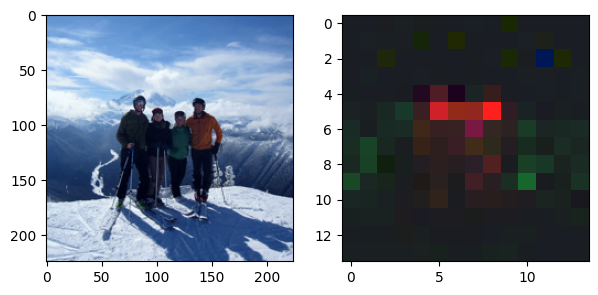

In [74]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 10))

ax1.imshow(norm_img)

start_idx = min(pca_image.shape[-1] - 3, 2)
print(start_idx)
ax2.imshow(normalize_image(pca_image[:, :, start_idx: start_idx + 3]));

In [63]:
norm_attn_map = np.moveaxis(normalize_image(patch_embeddings.reshape(H, H, -1)), -1, 0)
norm_attn_map.shape

(12, 14, 14)

In [64]:
num_maps = norm_attn_map.shape[0]
num_columns = 4
num_rows = num_maps // num_columns

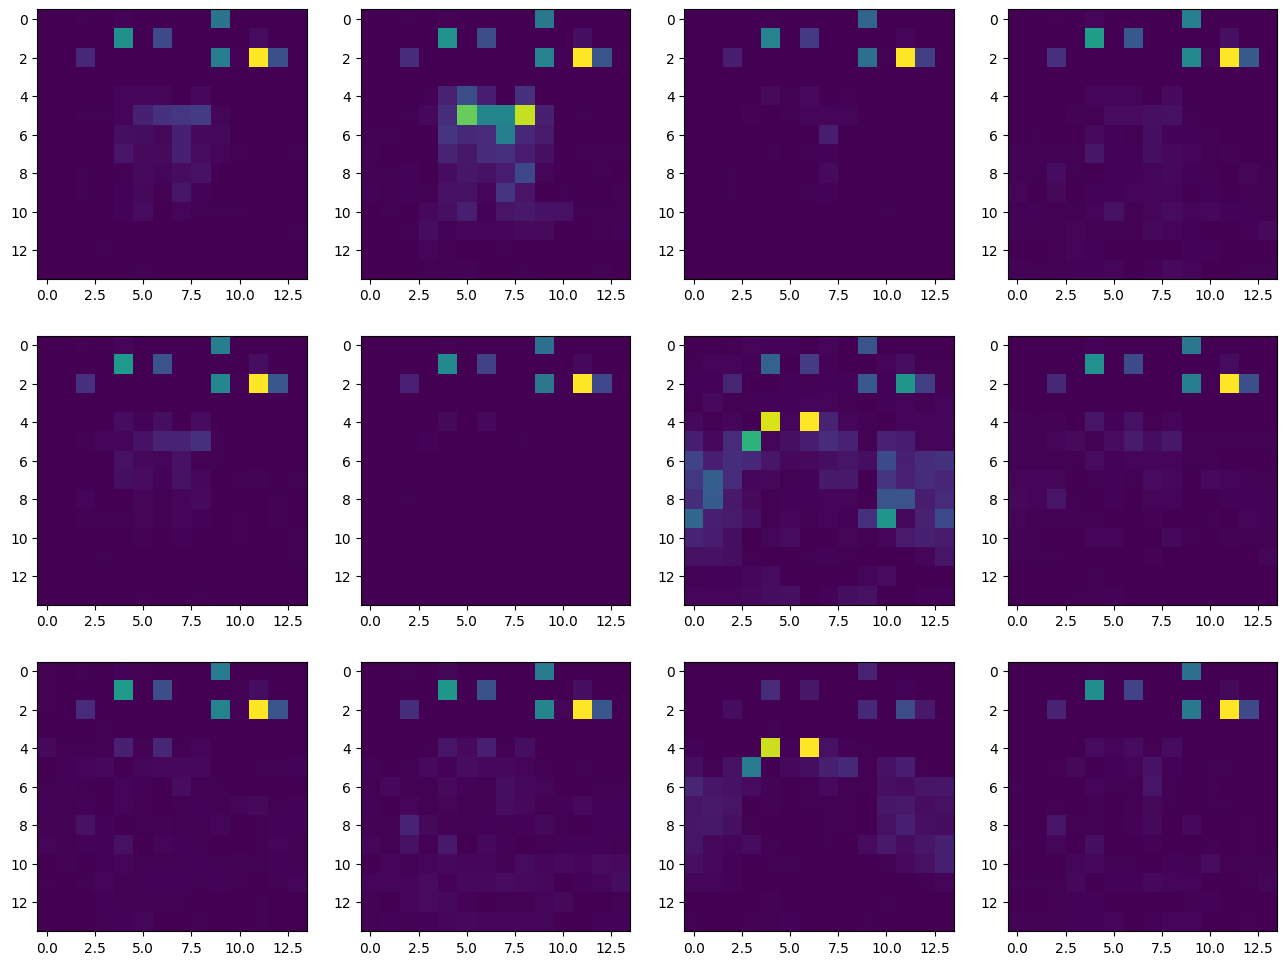

In [65]:
fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 12))

for ax, attn_mask in zip(axes.flatten(), norm_attn_map):
    ax.imshow(attn_mask)

In [66]:
norm_pca_image = np.moveaxis(normalize_image(pca_image), -1, 0)
norm_pca_image.shape

(12, 14, 14)

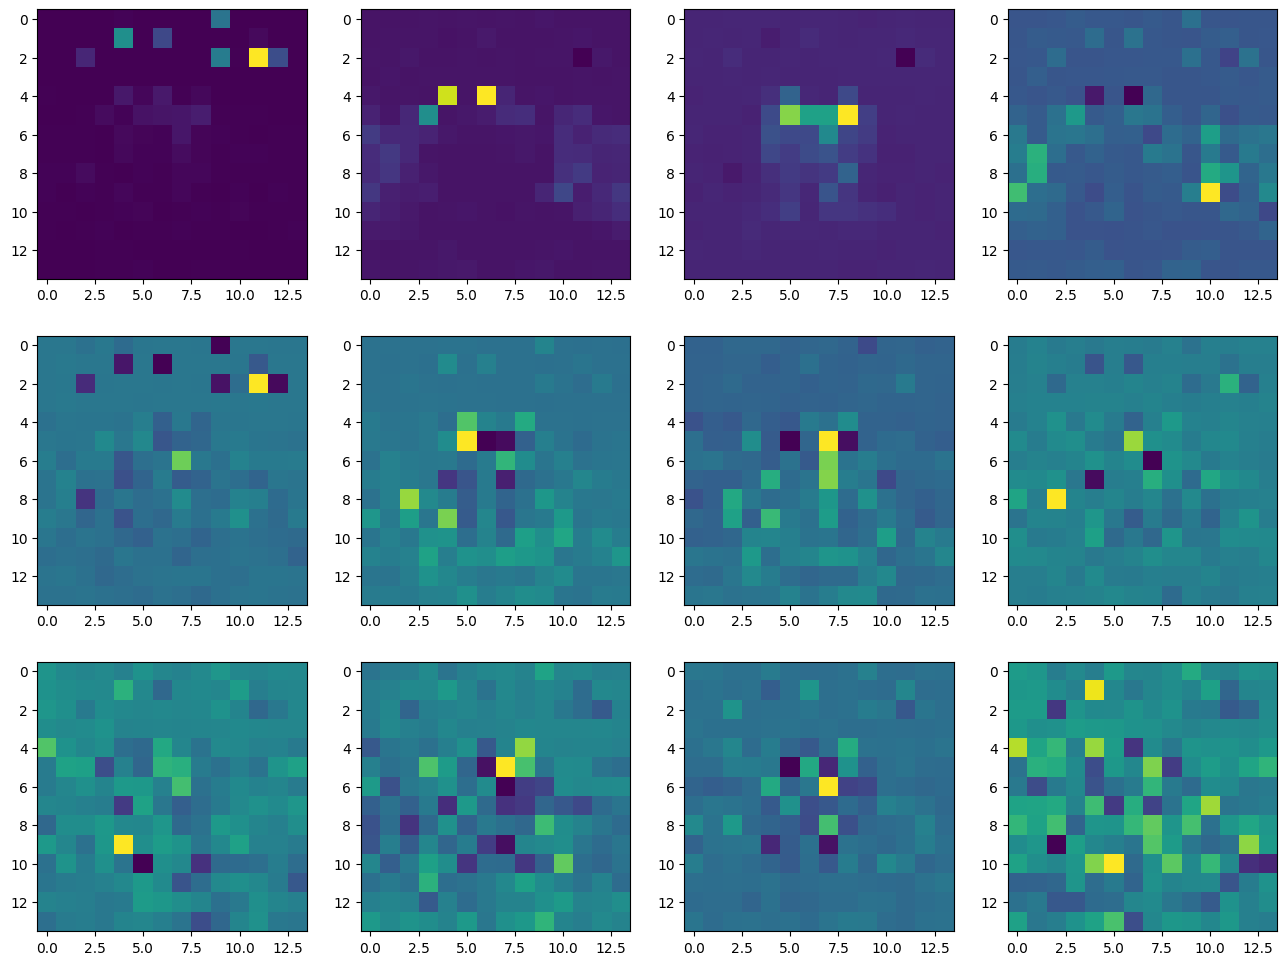

In [67]:
fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 12))

for ax, attn_mask in zip(axes.flatten(), norm_pca_image):
    ax.imshow(attn_mask)

In [76]:
patch_embeddings.shape

(256, 12)

In [77]:
rgb_matrix = np.array([
    [8, 61, 119],
    [235, 235, 211],
    [244, 211, 94],
    [238, 150, 75],
    [249, 87, 56],
    [253, 189, 176]
])
rgb_matrix.shape

(6, 3)

In [78]:
multi_attn_map = patch_embeddings @ rgb_matrix
multi_attn_map.shape

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 12)

In [30]:
H = math.isqrt(multi_attn_map.shape[0])

multi_attn_map_image = multi_attn_map.reshape((H, H, -1))

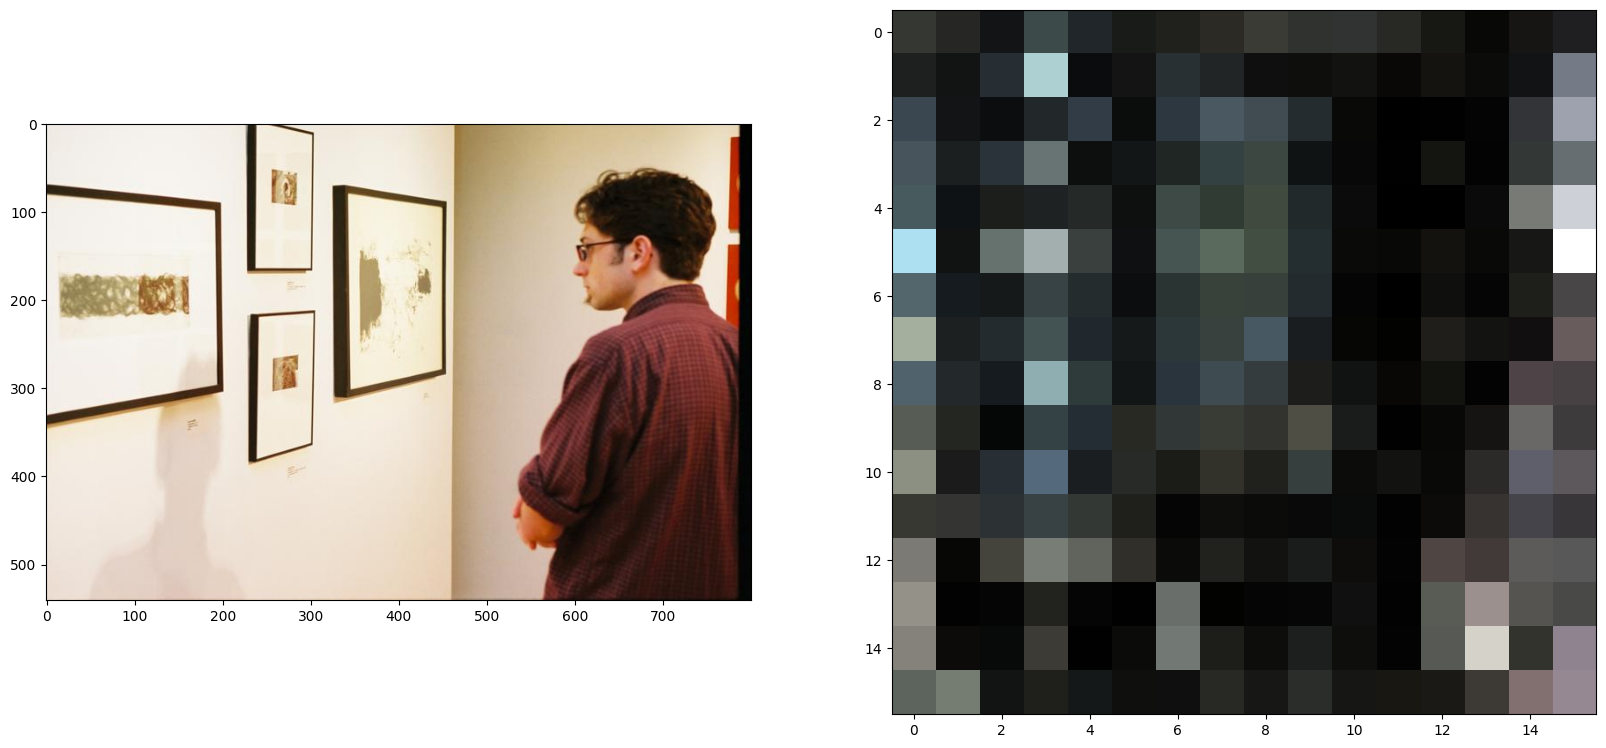

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.imshow(image)

ax2.imshow(normalize_image(multi_attn_map_image));